In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('IndexE8.csv')
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
data.shape

(6269, 5)

In [4]:
data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [5]:
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


### Plotting the data

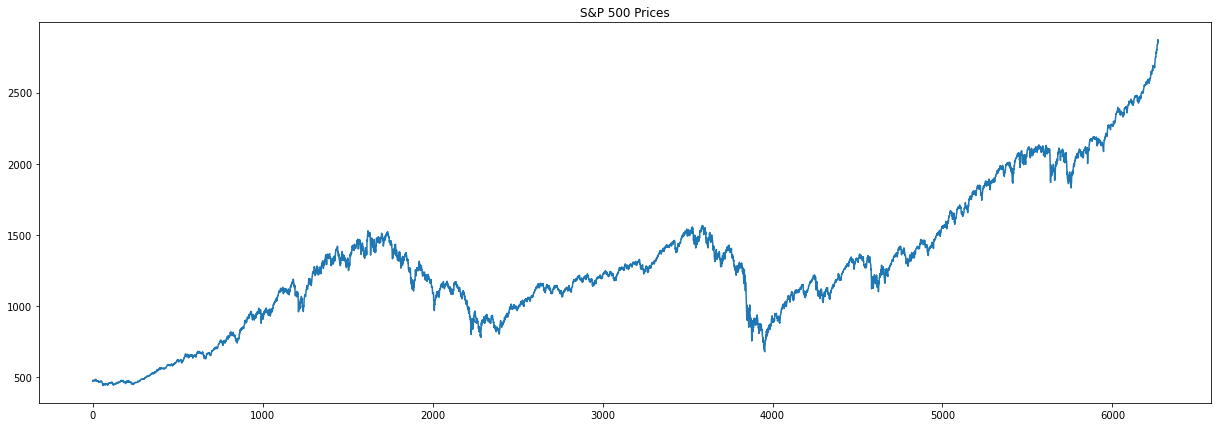

In [6]:
data.spx.plot(title = 'S&P 500 Prices', figsize = (21,7))
plt.show()

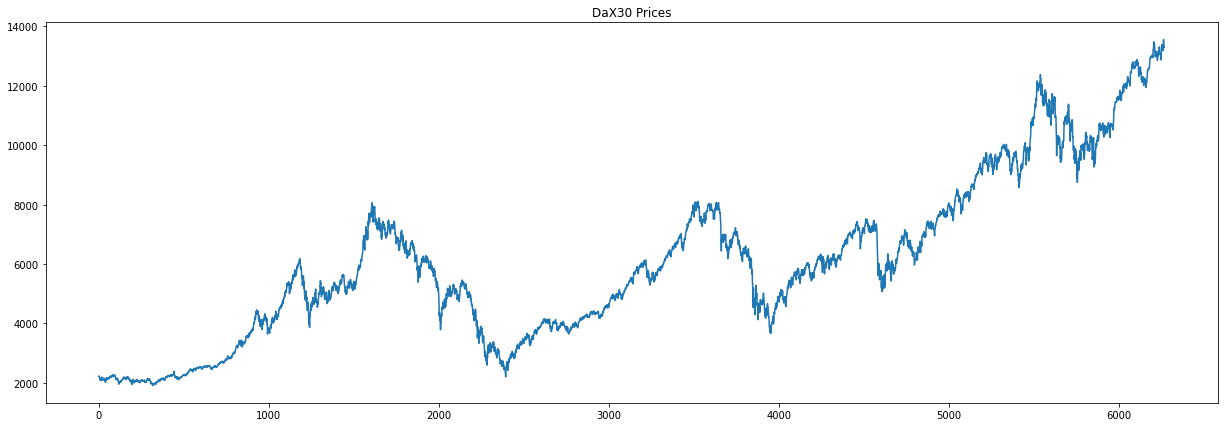

In [7]:
data.dax.plot(title = "DaX30 Prices", figsize = (21,7))
plt.show()

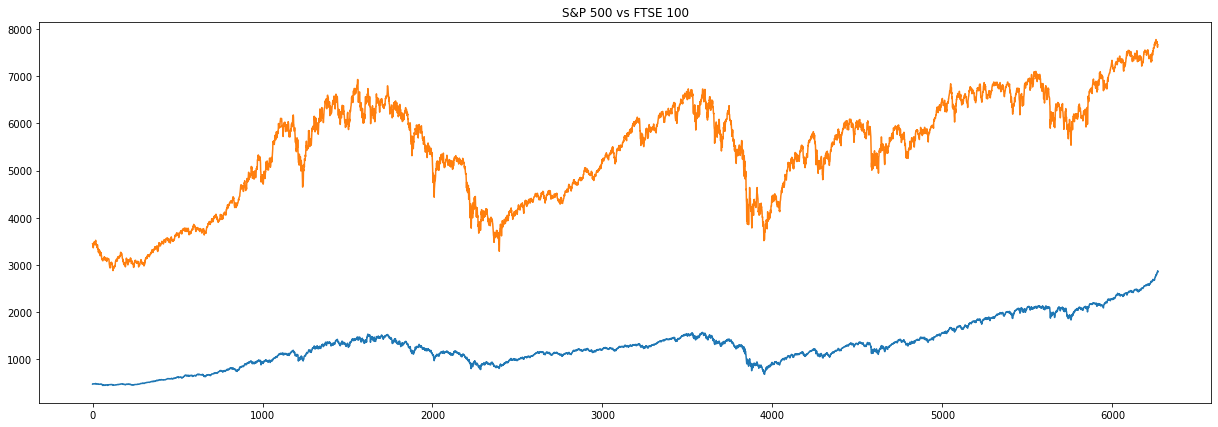

In [8]:
#plotting two in the same
data.spx.plot(title = 'S&P 500 Prices', figsize = (21,7))
data.ftse.plot(title = 'FTSE 100 Prices', figsize = (21,7))
plt.title("S&P 500 vs FTSE 100")
plt.show()

## Q-Q Plot

In [9]:
import scipy.stats
import pylab

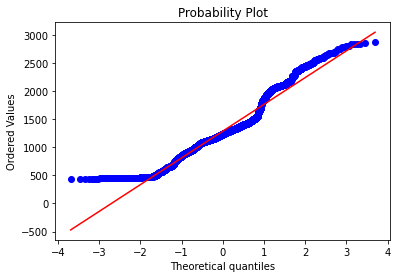

In [10]:
scipy.stats.probplot(data.spx, plot = pylab)
pylab.show()

In [11]:
data.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [12]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [13]:
#converting it to datetime datatype
data.date = pd.to_datetime(data.date, dayfirst = True)

In [14]:
data.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

In [15]:
data.date.describe()

C:\Users\USER\AppData\Local\Temp/ipykernel_9248/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [16]:
data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
data.set_index('date', inplace = True)

In [18]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
#b - business days    d - daily
data = data.asfreq('b')

In [20]:
data

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [21]:
data.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
data[data.isnull().any(axis =1)]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


In [23]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [24]:
data['market_value'] = data.spx

In [25]:
data.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [26]:
data.drop(['spx', 'dax', 'ftse', 'nikkei'], axis =1, inplace = True)

In [27]:
data.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


# splitting

In [28]:
#uninterrupted squence of values
size = int(len(data)*0.8)

In [29]:
#80-20 train test split
df = data.iloc[:size]
df_test = data.iloc[size:]

In [30]:
df.shape

(5021, 1)

In [31]:
df_test.shape

(1256, 1)

In [32]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [33]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [34]:
df.market_value.isnull().sum()

4

In [35]:
df.market_value.fillna(method = 'bfill', inplace = True)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [36]:
df.market_value.isnull().sum()

0

# White Noise

In [37]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [38]:
df['wn'] = wn

C:\Users\USER\AppData\Local\Temp/ipykernel_9248/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [39]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1133.646948
1994-01-10,475.27,888.221841
1994-01-11,474.13,1030.442061
1994-01-12,474.17,966.645908
1994-01-13,472.47,1329.447061


In [40]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.664167,1096.286755
std,292.559713,292.653592
min,438.920000,-7.591172
25%,914.835752,901.804950
50%,1144.650000,1092.570956
75%,1316.280729,1294.333390
max,1570.252238,2299.352375


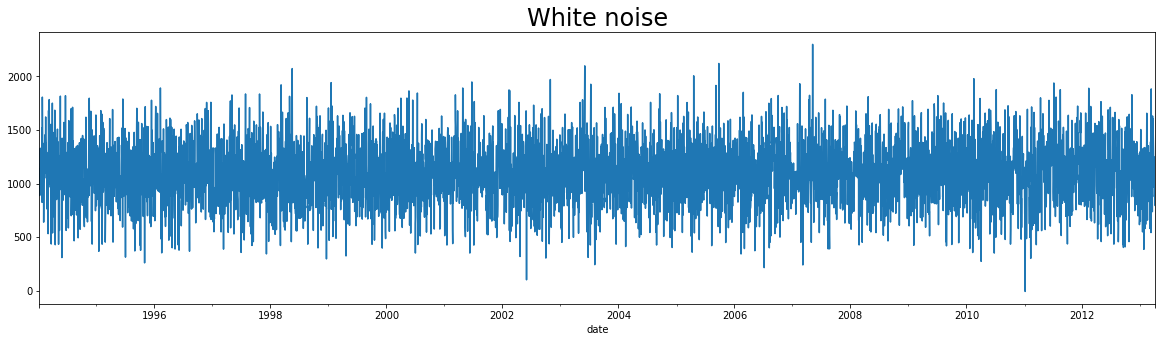

In [41]:
df.wn.plot(figsize = (20,5))
plt.title('White noise', size = 24)
plt.show()

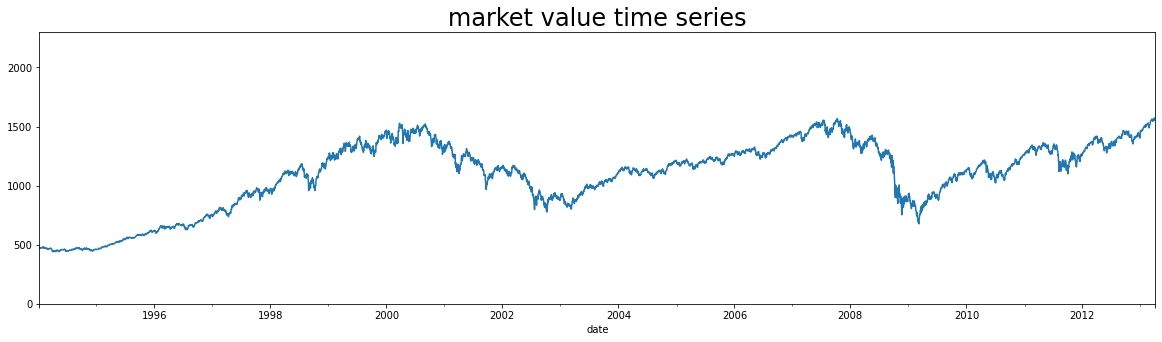

In [42]:
df.market_value.plot(figsize = (20,5))
plt.title('market value time series', size = 24)
plt.ylim(0, 2300)
plt.show()

In [43]:
rw = pd.read_csv('RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [44]:
rw.dtypes

date      object
price    float64
dtype: object

In [45]:
rw['date'] = pd.to_datetime(rw.date, dayfirst = True)

In [46]:
rw.head()

,date,price
0,1994-01-07,1122.139662
1,1994-01-08,1135.238562
2,1994-01-09,1109.897831
3,1994-01-10,1080.347860
4,1994-01-11,1082.095245


In [47]:
rw.set_index('date', inplace = True)

In [48]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [49]:
#set frequency of days as business days
rw = rw.asfreq('b')

In [50]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [51]:
df['rw'] = rw.price

C:\Users\USER\AppData\Local\Temp/ipykernel_9248/818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [52]:
df

,market_value,wn,rw
date,,,
1994-01-07,469.900000,1133.646948,1122.139662
1994-01-10,475.270000,888.221841,1080.347860
1994-01-11,474.130000,1030.442061,1082.095245
1994-01-12,474.170000,966.645908,1083.639265
1994-01-13,472.470000,1329.447061,1067.146255
...,...,...,...
2013-04-01,1562.173837,896.064323,2263.675474
2013-04-02,1570.252238,995.330362,2225.000870
2013-04-03,1553.686978,918.909468,2190.787688


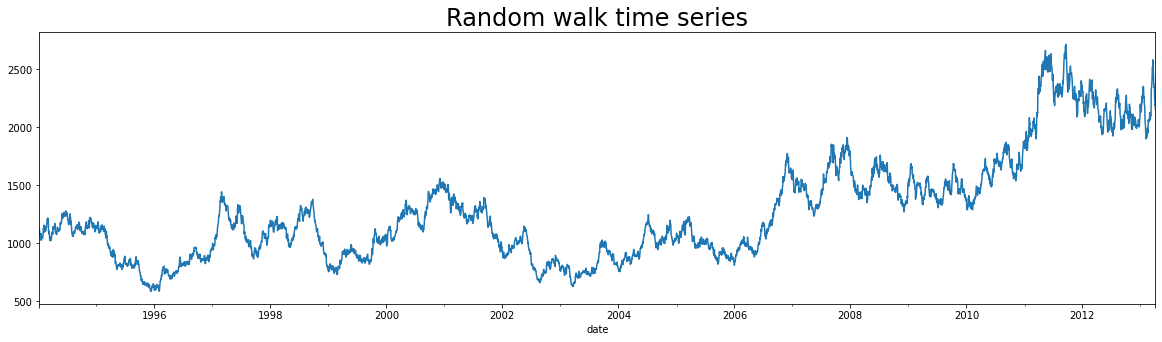

In [53]:
#plotting the random walk data
df.rw.plot(figsize = (20,5))
plt.title('Random walk time series', size = 24)
plt.show()

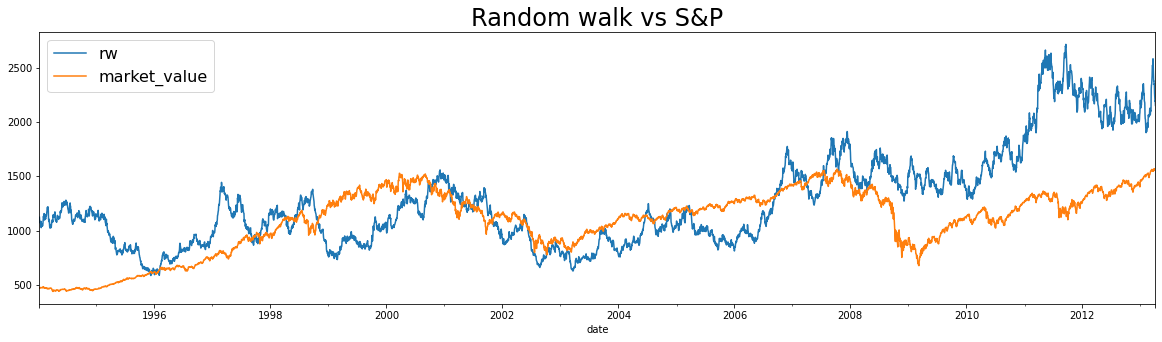

In [54]:
#let's compare both the time series
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.legend(fontsize = 16)
plt.title('Random walk vs S&P', size = 24)
plt.show()


In [55]:
#test for stationarity - dickey fuller test
import statsmodels.tsa.stattools as sts

In [56]:
sts.adfuller(df.market_value)

(-1.7373926676365972,
 0.4119568637016754,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39906.520821878556)

In [57]:
sts.adfuller(df.wn)
#hence we can say that white noise is an stationary series

(-69.27594977840225,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70815.86058802268)

In [58]:
sts.adfuller(df.rw)
#hence randomwalk is not a stationary series
#the more the value of information criteria harder it is to predict accurately

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [59]:
#one way to test for the seasonality - naive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


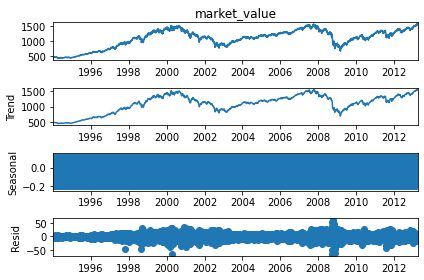

In [60]:
#with additive model
s_decadd = seasonal_decompose(df.market_value, model = 'additive')

s_decadd.plot()
#plt.figure(figsize = (20,9))
plt.show()

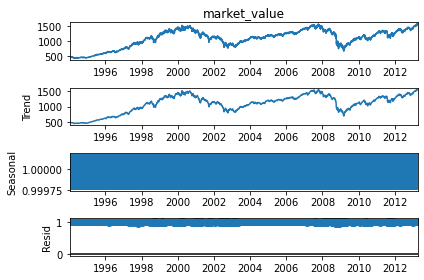

In [61]:
#with multiplicative model
s_decmul = seasonal_decompose(df.market_value, model = 'multiplicative')
s_decmul.plot()
plt.show()
#hence no seasonality in the data

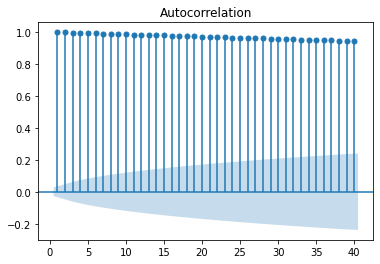

In [62]:
#autocorrelation function
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.show()
#all lags are significant

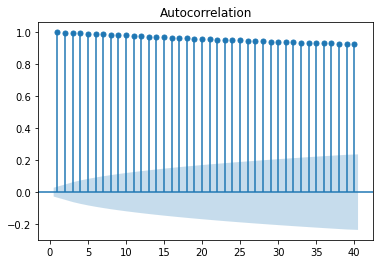

In [69]:
#for random walk data
sgt.plot_acf(df.rw, lags =40, zero = False)
plt.show()
#all lags are significant here as well

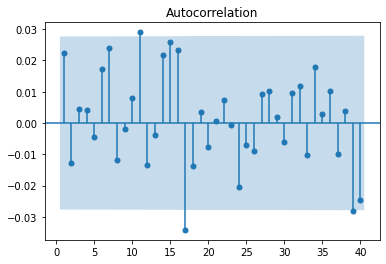

In [64]:
#for white noise data
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.show()
#no lags is significant, bcoz white noise is a random data

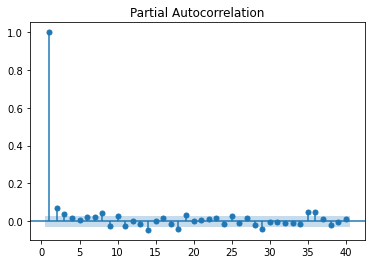

In [65]:
#PACF - partial autocorrelation function - measure the direct effect 
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.show()

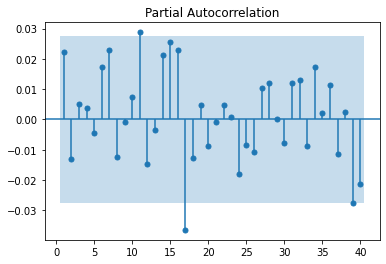

In [66]:
#for white noise data - since there is no autocorrelation in white noise data - we assume that no lags should be significant
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.show()

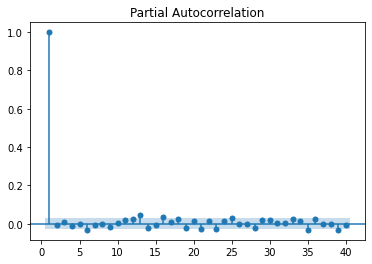

In [67]:
#for random walk
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.show()
#similar to my original data